# GRIP : The Sparks Foundation
### Data Science and Business Analytics Intern
### Author : Manjusha Parage
### Task 1: Prediction Using Supervised ML

#### In this task we have to predict the percentage score of a students based on the number of hours studied. 
#### The task has two variable where the feature is the no.of hours studied and the target value is the percentage score. 
#### This can be solved using simple linear regression.

#### Data can be found at http://bit.ly/w-data 

## 1 Problem Statement :

In [ ]:
# To predict the score of a student based on the number of hours they study per day.

## Importing Libraries :

In [1]:
import pandas as pd 
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## 2 Data Gathering :

### Read and load the Dataset :

In [2]:
URL = ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df = pd.read_csv(URL)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### To find the number of columns and rows

In [3]:
df.shape

(25, 2)

### Need to observe the dataset : 

In [ ]:
# First 5 Rows to use this function df.head())

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Last 5 Rows to use this function df.tail()

In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Detailed information on each column of the dataset :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


### To Check Missing Values :

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# I can see that there is no missing value in our dataset .

## Checking for Outliers :

<Axes: xlabel='Hours'>

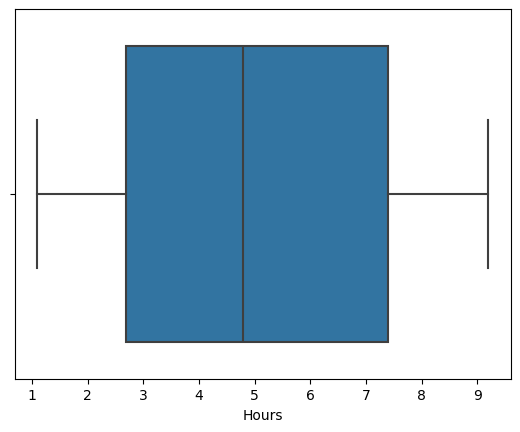

In [8]:
sns.boxplot(x = df['Hours'])

In [ ]:
# There is no outlier present.

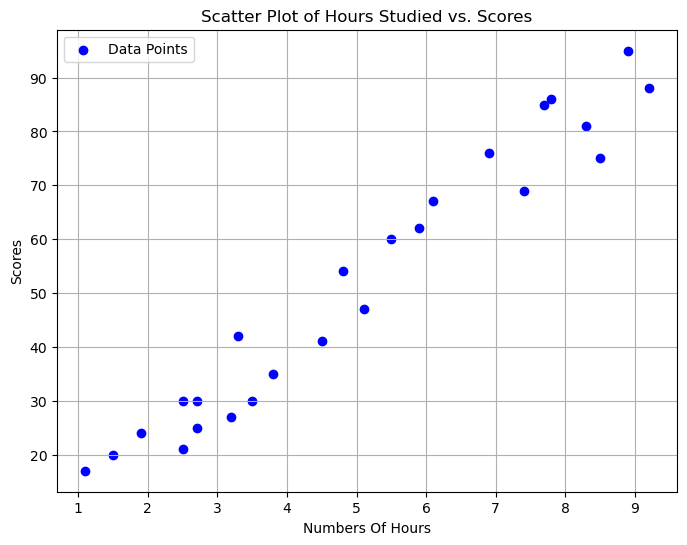

In [9]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours'],df['Scores'], color='blue', label='Data Points')

# Add labels and title
plt.title('Scatter Plot of Hours Studied vs. Scores')
plt.xlabel('Numbers Of Hours')
plt.ylabel('Scores')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


In [ ]:
# Find the Correlation 

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Train Test Split :

In [ ]:
# We are just defining independent and dependent variable 

In [11]:
x = df.drop('Scores', axis = 1) # independent Variable 
y = df['Scores'] # dependent variable 

In [12]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [13]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

## Splitting data into training and testing data :

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

## Model Training :

In [16]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [17]:
linear_reg_model.coef_

array([9.94061514])

In [18]:
linear_reg_model.intercept_

1.5079104828268726

## Model Evaluation :

### Evaluation Of Training Data : 

In [19]:
y_train_pred = linear_reg_model.predict(x_train)
y_train_pred[:5]

array([28.34757137, 86.0031392 , 26.35944834, 46.24067863, 39.28224803])

In [20]:
y_train[:5] # actual values 

9     25
3     75
16    30
12    41
22    35
Name: Scores, dtype: int64

In [21]:
# Residual train = actual value - predicted value

residual_train = y_train - y_train_pred
residual_train[:5]

9     -3.347571
3    -11.003139
16     3.640552
12    -5.240679
22    -4.282248
Name: Scores, dtype: float64

In [22]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [23]:
mse = mean_squared_error(y_train , y_train_pred)
print('Mean squared error of training data',mse)

rmse =np.sqrt(mse)
print('Root mean squared error of training data',rmse)

mae = mean_absolute_error(y_train , y_train_pred)
print('Mean absolute error of training data',mae)

r2_value = r2_score(y_train , y_train_pred)
print('R Squared of training data',r2_value)

Mean squared error of training data 30.242362697512128
Root mean squared error of training data 5.499305655945315
Mean absolute error of training data 5.078010607295139
R Squared of training data 0.9423348138802985


In [24]:
x_test

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


## Evalaution Of Testing Data :

In [25]:
y_pred = linear_reg_model.predict(x_test)
y_pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [26]:
y_test[:5]

14    17
0     21
17    24
6     88
23    76
Name: Scores, dtype: int64

In [27]:
residual = y_test - y_pred # actual values - predicted values
residual[:5] # only 5 rows

14    4.557413
0    -5.359448
17    3.604921
6    -4.961570
23    5.901845
Name: Scores, dtype: float64

In [28]:
mse = mean_squared_error(y_test,y_pred)
print('Mean squared error of testing data',mse)

Mean squared error of testing data 24.38762033985666


In [29]:
rmse = np.sqrt(mse)
print('Root mean squared error of testing data',rmse)

Root mean squared error of testing data 4.938382360637607


In [30]:
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error of testing data',mae)

Mean absolute error of testing data 4.877039354964484


In [31]:
r2_value = r2_score(y_test, y_pred)
print('R-squared of testing data', r2_value)

R-squared of testing data 0.9735538080811826


### What will be predicted score if a student studies for 9.25 hrs/day?

In [32]:
# Testing with your own data

hours = 9.25
own_pred = linear_reg_model.predict([[hours]])
print("Predicted score for 9.25 hours/day:",own_pred)

Predicted score for 9.25 hours/day: [93.45860056]
